In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

#fitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('complete_dataset (1).csv')

In [3]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [5]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


In [6]:
df.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'RRP'}>]], dtype=object)

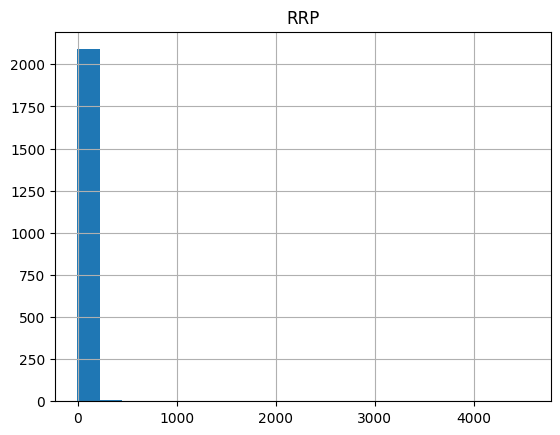

In [8]:
df.hist(column='RRP', bins=20, grid=True)

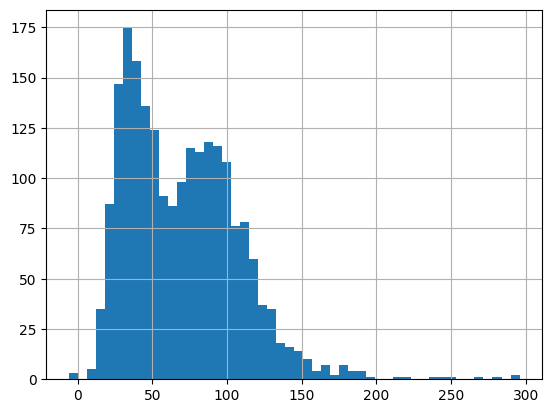

In [9]:
df['RRP'][df['RRP'] < 500].hist(bins=50)
plt.show()

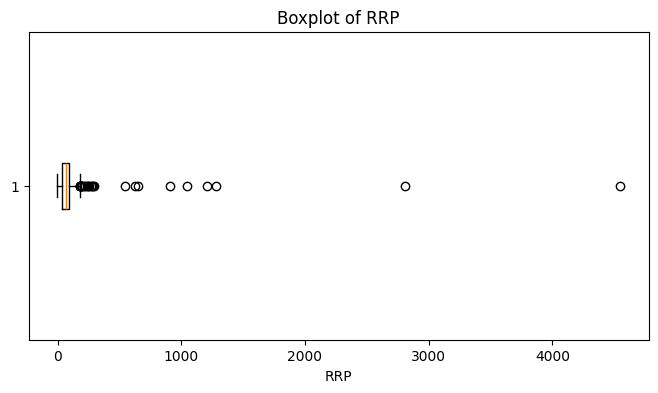

In [10]:
plt.figure(figsize=(8,4))
plt.boxplot(df['RRP'], vert=False)
plt.title("Boxplot of RRP")
plt.xlabel("RRP")
plt.show()

#TO Datetime

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.set_index('date', inplace=True)

In [13]:
df['holiday'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df['holiday'] = df['holiday'].map({'Y': 1, 'N': 0})

In [15]:
df['school_day'].unique()

array(['N', 'Y'], dtype=object)

In [16]:
df['school_day'] = df['school_day'].map({'Y': 1, 'N': 0})

In [17]:
df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,0,1
2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,0,0
2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,0,0
2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,0,0
2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,0,0


In [18]:
corr = df.corr()

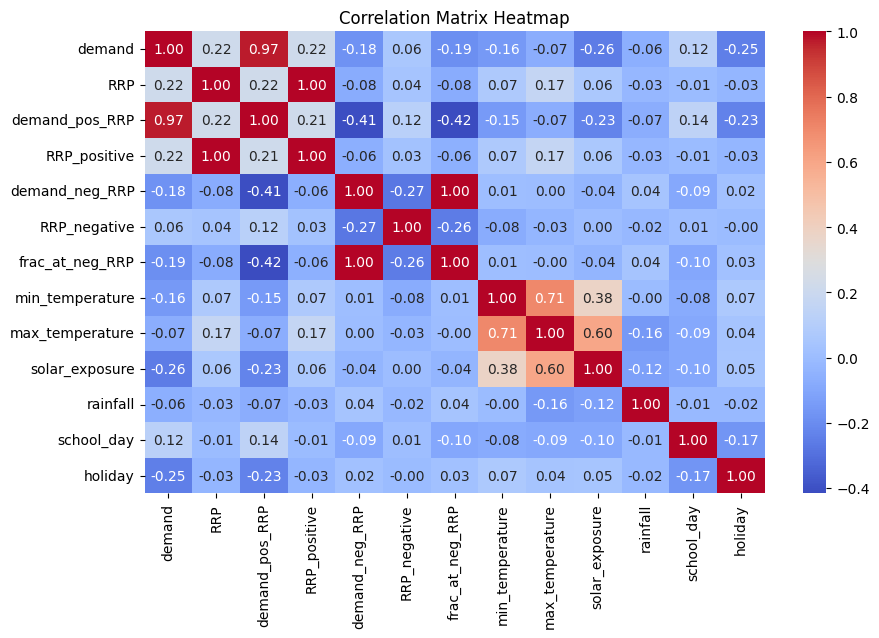

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2015-01-01 to 2020-10-06
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   demand           2106 non-null   float64
 1   RRP              2106 non-null   float64
 2   demand_pos_RRP   2106 non-null   float64
 3   RRP_positive     2106 non-null   float64
 4   demand_neg_RRP   2106 non-null   float64
 5   RRP_negative     2106 non-null   float64
 6   frac_at_neg_RRP  2106 non-null   float64
 7   min_temperature  2106 non-null   float64
 8   max_temperature  2106 non-null   float64
 9   solar_exposure   2105 non-null   float64
 10  rainfall         2103 non-null   float64
 11  school_day       2106 non-null   int64  
 12  holiday          2106 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 230.3 KB


In [21]:
df.columns

Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],
      dtype='object')

<Axes: >

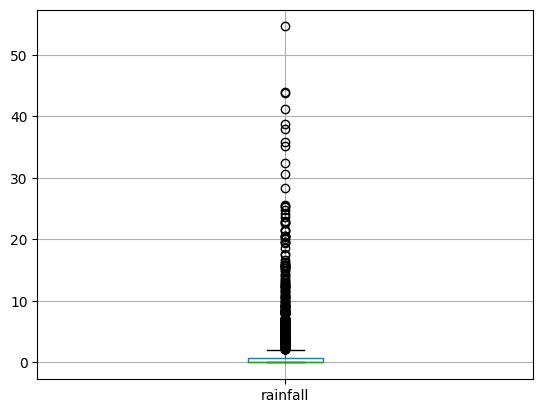

In [22]:
df[['rainfall']].boxplot()

<Axes: >

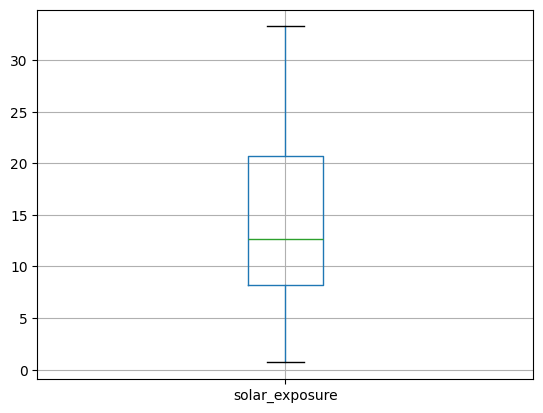

In [23]:
df[['solar_exposure']].boxplot()

<Axes: >

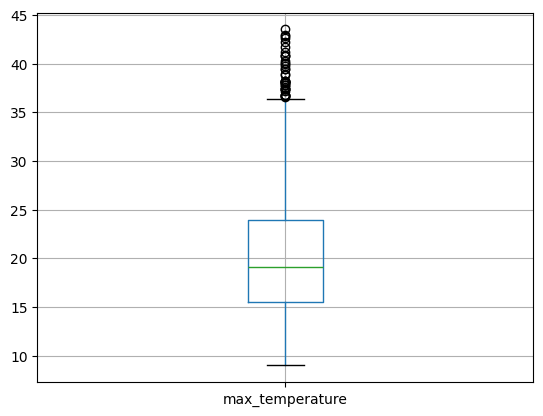

In [24]:
df[['max_temperature']].boxplot()

### Pipeline

In [25]:
num_transformer = make_pipeline(SimpleImputer(strategy='median'), RobustScaler())

In [26]:
cat_transformer = OneHotEncoder()

In [27]:
num_col = make_column_selector(dtype_include=['float64', 'int64']) 
cat_col = make_column_selector(dtype_include='object')

In [28]:
preproc = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col)
)

In [29]:
preproc

,transformers,"[('pipeline', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [30]:
df.columns

Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],
      dtype='object')

In [113]:
X = df.drop(columns=["RRP",'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'frac_at_neg_RRP'])
y = df["RRP"]

In [114]:
X_preproc = preproc.fit_transform(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_preproc, y, test_size=0.3, random_state=42)

In [116]:
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
model.score(X_test, y_test)

/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


-0.3663683083344986

In [119]:
cv_results = cross_validate(model, X_preproc, y, cv=5)

/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  ret

In [120]:
cv_results

{'fit_time': array([0.00260592, 0.00199103, 0.00218296, 0.00114417, 0.00251293]),
 'score_time': array([0.00092387, 0.00067186, 0.0006988 , 0.00049591, 0.00100923]),
 'test_score': array([-8.06786238, -0.79581451,  0.08561843,  0.02042422,  0.12133609])}

In [122]:
import os, sys

In [124]:
from electricity.preprocessing import Preprocessor

ModuleNotFoundError: No module named 'electricity'